## <u>Steps for Hypothesis Testing</u>

### Step - 1 :

<b>Null Hypothesis (Status Quo): $ \ \ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $ <br></b>
<b>Alternate Hypothesis (Bold claim): $ \ \ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq  $</b> <br>

$ H_0 \ : \ ? $<br>
$ H_1 \ : \ ? $

### Step - 2 :
<ul>
<li><b>Collect a sample of size n = 10 :  </b></li>
<li><b>Compute sample mean : &nbsp; &nbsp; $ \bar{x} = ?$</b></li>
</ul>

### Step - 3 :

#### Compute Test Statistic:
<b> Since, Population Variance is Unknown, we will use t-test $$ t = \frac{\bar{x} \ - \mu}{s / \sqrt{n}} $$</b>


### Step - 4 :

<b>Decide $ \alpha $ or significance level : </b> $ \ \ \ \alpha = 1 - Confidence\_level $ <br>
<b>Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.</b>

### Step - 5 :

### Apply Decision Rule : 
<b>As test statistic is t-score : </b>
<ul>
    <li>Two-Tailed t-test :$$ |{t}| \ \gt \ t_{n-1}, \ _\frac{\alpha}{2} \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$</li>
    <li>Right tailed t-test : $$ t \ \gt \ t_{n-1}, \ _\alpha \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$</li>
    <li>Left tailed t-test : $$ t \ \lt \ t_{n-1}, \ _\alpha \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$</li>
</ul>

#### Compute p-value $ P(Test \ Statistics | H_0) $
<ul>
    <li>Two-Tailed Test : $$ p\_value \ = \ 2 \star (1.0 \ - \ cdf(test \ statistic)) $$</li>
    <li>One-Tailed Test : $$ p\_value \ = \ 1 \star (1.0 \ - \ cdf(test \ statistic)) $$</li>
</ul>

Now, $$ If \ (p\_value \ \lt \ \alpha) \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$

In [47]:
# Importing the necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import math

In [48]:
# Function to calculate t_score value

def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? <strike>(Given that the population std is 50)</strike>


### Step - 1 :

In this case, <br>
$ H_0 \ \Rightarrow \ \mu \ = 500 $ <br>
$ H_1 \ \Rightarrow \ \mu \ \neq 500 $ <br>

In [49]:
# Null Hypothise is our Population Mean
pop_mean = 500

### Step - 2 : 

<ul>
<li><b>Collect a sample of size n = 10 :  </b>&nbsp;  &nbsp; &nbsp; [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]</li>
<li><b>Compute sample mean : &nbsp; &nbsp; $ \ \ \ \ \ \ \ \  \ \ \ \ \bar{x} = 465.3 $</b></li>
</ul>

In [51]:
sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample = np.array(sample)

# Sample Mean
sample_mean = np.mean(sample)
print('Sample Mean :', sample_mean)

Sample Mean : 465.3


### Step - 3 : 

#### Compute Test Statistic, t-score:
$$ t = \frac{\bar{x} \ - \mu}{s / \sqrt{n}} $$


In [52]:
# Standard Deviation of the Sample

sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 9)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 86.84859110991827


In [53]:
# Defining the Sample & Population Parameters

pop_mean = 500
sample_mean = 465.3
sample_std = 86.8
sample_size = 10

In [54]:
# Calculating the t-score

t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : -1.2641824286617827


### Step - 4 :

<b> Decide $ \alpha $ or significance level : </b> $ \ \ \ \alpha = 1 - Confidence\_level $ <br>
This is a <b>Two Tailed Test</b>

In [55]:
# Two Tail - Deciding the Significance Level & Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha/2, df = 9)
print('t_critical :', t_critical)

t_critical : 2.2621571627409915


#### Visualizing the Sampling Distribution with Rejection Regions

t_critical_left : 437.90702056331673
t_critical_right : 562.0929794366832


Text(465.3, 0.0007, 'x_bar')

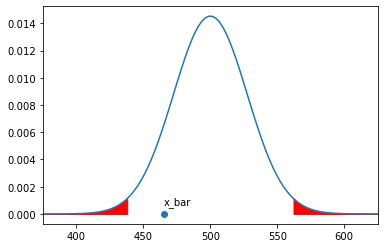

In [57]:
# Defining the x min & x max
x_min = 375
x_max = 625

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

Here in this case, Sample Mean does not fall in the Rejection Region <br>
That means, We <b>Fail to Reject Null Hypothesis</b>

### Step - 5 :

#### <u>Apply Decision Rule</u> : 
<b>As test statistic is t-score AND it's a Two-Tailed t-test, then , </b>
    $$ |{t}| \ \gt \ t_{n-1}, \ _\frac{\alpha}{2} \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$

#### Compute p-value $ P(Test \ Statistics | H_0) $ <br>
   <b>For Two-Tailed Test :</b> $$ p\_value \ = \ 2 \star (1.0 \ - \ cdf(test \ statistic)) $$

In [58]:
# Conclusion using t-test

if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [59]:
# Conclusion using p-test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20616455613128926
Fail to reject Null Hypothesis


<br>

### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? <strike>(Given that the population std is 0.5)</strike>


### Step - 1 :

In this case, <br>
$ H_0 \ \Rightarrow \ \mu \ \leq 4 $ <br>
$ H_1 \ \Rightarrow \ \mu \ \gt 4 $ <br>

In [60]:
# So here the Population Mean
pop_mean = 4

### Step - 2 :

<ul>
<li><b>Collect a sample of size n = 20 :  </b>&nbsp;  &nbsp; &nbsp; $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
</li>
<li><b>Compute sample mean : &nbsp; &nbsp; $$ \bar{x} = 4.25 $$</b></li>
</ul>

In [61]:
sample = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
sample = np.array(sample)

# Sample Mean
sample_mean = np.mean(sample)
print('Sample Mean :', sample_mean)

Sample Mean : 4.25


### Step - 3 :

#### Compute t-score:
$$ t = \frac{\bar{x} \ - \mu}{s / \sqrt{n}} $$</b>

In [62]:
# Standard Deviation of the Sample

sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / (len(sample)-1))
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 0.8506963092234007


In [63]:
# Defining the Sample & Population Parameters

pop_mean = 4
sample_mean = 4.25
sample_std = 0.85
sample_size = 20

In [64]:
# Calculating the t-score

t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 1.3153341044116411


### Step - 4 :

<b>Decide $ \alpha $ or significance level : </b> $ \ \ \ \alpha = 1 - Confidence\_level $ <br>
This is a <b>Right Tailed Test </b>

In [65]:
# Right Tailed - Deciding the Significance Level & Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha, df = 19)
print('t_critical :', t_critical)

t_critical : 1.729132811521367


t_critical_right : 4.328648973238404


Text(4.25, 0.1, 'x_bar')

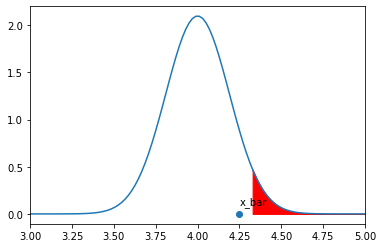

In [66]:
# Visualizing the Sampling Distribution with Rejection Regions

# Defining the x min & x max
x_min = 3
x_max = 5

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values of Two tailed Test

t_critical_right = pop_mean + (t_critical * std)
print('t_critical_right :', t_critical_right)

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In this case, we can see that Sample Mean is not falling in the Rejected Region, <br>
Hence, we <b>Fail to Reject Null Hypothesis</b>

### Step - 5 :

#### <u>Apply Decision Rule</u> :
<b>As test statistic is t-score AND it's a Right tailed t-test ,</b>
    $$ t \ \gt \ t_{n-1}, \ _\alpha \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$

#### Compute p-value $ \ P(Test \ Statistics | H_0) $
   <b>As it's One-Tailed Test , $$ p\_value \ = \ 1 \star (1.0 \ - \ cdf(test \ statistic)) $$</b>

In [67]:
# Conclusion using t-test

if t_sc > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [68]:
# Conclusion using p-test

p_value = 1 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09419882054165774
Fail to reject Null Hypothesis


<br>

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? <strike>(Given that the population std is 1)</strike>


### Step - 1 :

In this case, <br>
$ H_0 \ \Rightarrow \ \mu \ \leq 15 $ <br>
$ H_1 \ \Rightarrow \ \mu \ \gt 15 $ <br>

In [69]:
# So here Population Mean

pop_mean = 15

### Step - 2 :

<ul>
<li><b>Collect a sample of size n = 20 :  </b>&nbsp;  &nbsp; &nbsp; $$ $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$ $$
</li>
<li><b>Compute sample mean : &nbsp; &nbsp; $$ \bar{x} = 15.099 $$</b></li>
</ul>

In [70]:
sample = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
sample = np.array(sample)

# Sample Mean
sample_mean = np.mean(sample)
print('Sample Mean :', sample_mean)

Sample Mean : 15.099


### Step - 3 :

#### Compute Test Statistic, t_score ,
$$ t = \frac{\bar{x} \ - \mu}{s / \sqrt{n}} $$</b>

In [71]:
# Standard Deviation of the Sample

sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / (len(sample)-1))
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.0253671999517255


In [72]:
# Defining the Sample & Population Parameters

pop_mean = 15
sample_mean = 15.1
sample_std = 1
sample_size = 20

In [73]:
# Calculating the t-score

t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 0.4472135954999564


### Step - 4 :

<b>Decide $ \alpha $ or significance level : </b> $ \ \ \ \alpha = 1 - Confidence\_level $ <br>
<br>
This is a <b>Right Tailed Test</b>

In [74]:
# Deciding the Significance Level & Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha, df = 19)
print('t_critical :', t_critical)

t_critical : 1.729132811521367


#### Visualizing the Sampling Distribution with Rejection Region


t_critical_right : 15.38664585086871


Text(15.1, 0.1, 'x_bar')

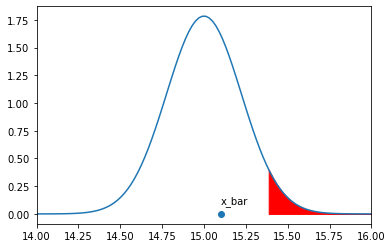

In [77]:
# Defining the x min & x max
x_min = 14
x_max = 16

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values of Right tailed Test

t_critical_right = pop_mean + (t_critical * std)
print('t_critical_right :', t_critical_right)

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In this Case, Sample Mean is not falling in the Rejection Region,<br>
Hence, we <b>Fail to reject Null Hypothesis</b>.

### Step - 5 :

#### <u>Apply Decision Rule</u> :
<b>As test statistic is t-score AND it's a Right tailed t-test ,</b>
    $$ t \ \gt \ t_{n-1}, \ _\alpha \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$

#### Compute p-value $ \ P(Test \ Statistics | H_0) $
   <b>As it's One-Tailed Test , $$ p\_value \ = \ 1 \star (1.0 \ - \ cdf(test \ statistic)) $$</b>

In [78]:
# Conclusion using t-test

if t_sc > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [79]:
# Conclusion using p-test

p_value = 1.0 - norm.cdf(np.abs(t_sc))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32736042300928914
Fail to reject Null Hypothesis


<br>

### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? <strike>(Based on past data you know that the std is 10 ms)</strike>

### Step - 1 :

In this case, <br>
$ H_0 \ \Rightarrow \ \mu \ \geq 100 $ <br>
$ H_1 \ \Rightarrow \ \mu \ \lt 100 $ <br>

In [80]:
# Population Mean
pop_mean = 100

### Step - 2 :

Collect a sample of size, n = 100 <br>
Compute sample mean$$ \bar{x} \ = \ 97.5 $$

In [81]:
# Lets assume,
sample_size = 100
sample_mean = 97.5

### Step - 3 :

#### Compute Test Statistic, t_score,
$$ t = \frac{\bar{x} \ - \mu}{s / \sqrt{n}} $$</b>

In [82]:
# Defining the Sample & Population Parameters

pop_mean = 100
sample_mean = 97.5
sample_std = 7      # Assumed
sample_size = 100

In [83]:
# Calculating the t-score

t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : -3.5714285714285716


### Step - 4 :

<b>Decide $ \alpha $ or significance level : </b> $ \ \ \ \alpha = 1 - Confidence\_level $ <br>
<br>
This is a <b>Left Tailed Test</b>

In [89]:
# Deciding the Significance Level & Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha, df = 99)
print('t_critical :', t_critical)

t_critical : 1.6603911559963895


#### Visualizing the Sampling Distribution with Rejection Region

t_critical_left : 98.83772619080253


Text(97.5, 0.02, 'x_bar')

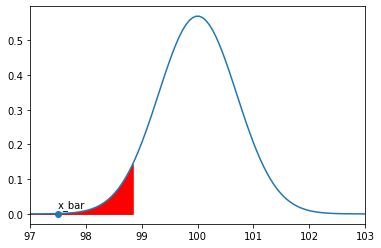

In [90]:
# Defining x-min & x-max
x_min = 97
x_max = 103

# Defining the Sample Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Plotting the graph & setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left critical value for the Left tailed test
t_critical_left = pop_mean + (-t_critical * std)
print('t_critical_left :', t_critical_left)

# Shading the Left Rejection Region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Plot the Sample_mean & concluding the result
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.02))

### Step - 5 :

#### <u>Apply Decision Rule</u> :
<b>As test statistic is t-score AND it's a Left tailed t-test ,</b>
    $$ t \ \lt \ t_{n-1}, \ _\alpha \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$

#### Compute p-value $ \ P(Test \ Statistics | H_0) $
   <b>As it's One-Tailed Test , $$ p\_value \ = \ 1 \star (1.0 \ - \ cdf(test \ statistic)) $$</b>

Now, $$ If \ (p\_value \ \lt \ \alpha) \ \Rightarrow \ Accept \ H_1 \ or \ Reject \ H_0 $$

In [86]:
# Conclusion using t-test

if t_sc < -t_critical:
    print('Reject Null Hypothesis')
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [87]:
# Conclusion using p-test

p_value = 1.0 - norm.cdf(np.abs(t_sc))
print('p_value :', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

p_value : 0.00017751969037349546
Reject Null Hypothesis
